# Quality

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
from matplotlib.patches import Ellipse

## Code

Define figure dimensions:

In [2]:
fig_width_mm = 88 # single column width for Nature Comms
fig_width_2col_mm = 180 # double column width for Nature Comms

mm = 1/25.4  # millimeters in inches

fig_width_inches = fig_width_mm * mm
fig_width_2col_inches = fig_width_2col_mm * mm

fig_height_inches = (3 / 4) * fig_width_inches

Define default plot settings:

In [3]:
rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

## Load images

In [4]:
safety = Image.open("./quality_images/safety2.jpg")
reliability = Image.open("./quality_images/reliability2.jpg")
manufacturability = Image.open("./quality_images/manufacturability2.jpg")

Add padding to reliability figure:

In [5]:
# Define the padding sizes
top_padding = 200  # in pixels
bottom_padding = 200  # in pixels

# Get the current width and height of the image
width, height = reliability.size

# Calculate new size with padding
new_height = height + top_padding + bottom_padding

# Create a new image with the new size and white background
reliability_padded = Image.new("RGB", (width, new_height), (255, 255, 255))

# Paste the original image onto the new image, offset by the top padding
reliability_padded.paste(reliability, (0, top_padding))

## Plot

Create ellipse for a single cell in the reliability figure:

In [6]:
ellipse = Ellipse(
    xy=(3530, 2000),  # Center of the ellipse
    width=250,  # Width of the ellipse
    height=110,  # Height of the ellipse
    edgecolor='none',  # Red edge color
    facecolor='r',  # Red face color
    alpha=0.5  # Transparency level
)

Plot:

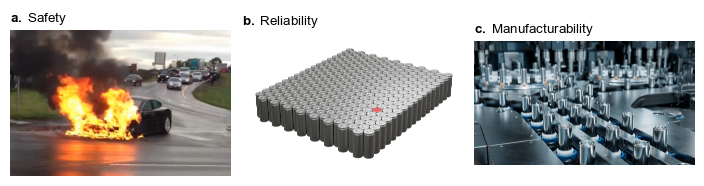

In [7]:
fig, ax = plt.subplots(figsize=(fig_width_2col_inches, fig_height_inches), nrows=1, ncols=3)

ax[0].set_title("$\\bf{a.}$ Safety", loc="left")
ax[1].set_title("$\\bf{b.}$ Reliability", loc="left")
ax[2].set_title("$\\bf{c.}$ Manufacturability", loc="left")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

ax[0].imshow(safety)
ax[1].imshow(reliability_padded)
ax[2].imshow(manufacturability)

ax[1].add_patch(ellipse)

plt.savefig("quality.pdf", dpi=300, bbox_inches="tight", format="pdf")